In [1]:
#Really need these
import pandas as pd 
import numpy as np
from numpy import *

#Handy for debugging
import gc
import time
import warnings
import os

#Date stuff
from datetime import datetime
from datetime import timedelta

#Nice graphing tools
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls


In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/my_research/2021_GEARS/water_quality'

os.chdir(path)

Mounted at /content/drive


In [ ]:
# !pip install windrose openpyxl

In [ ]:
# from windrose import WindroseAxes
# # https://hatarilabs.com/ih-en/how-to-make-a-wind-rose-with-python-tutorial
# df = pd.read_csv('./data/scripps_daily_weather_station_46254.csv')
# df.dropna(inplace=True)

# df['date'] = [datetime.strptime(date, '%Y/%m/%d').date() for date in df['date'].astype(str).values.tolist()]
# df['WDIR'] = df['WDIR'].astype('float32')     
# df_wind = df[['date', 'WDIR', 'WSPD']]

# data_start = datetime.strptime('2013-03-01', '%Y-%m-%d').date()
# data_end = datetime.strptime('2013-09-01', '%Y-%m-%d').date()
# df_wind = df_wind[(df_wind['date'] >= data_start) & (df_wind['date'] < data_end)]
# print(df_wind)
# # print("rows num:", df_wind.shape[0])
# ax = WindroseAxes.from_ax()
# ax.bar(df_wind.WDIR, df_wind.WSPD, normed=True, opening=0.8, edgecolor='white')
# ax.set_legend()

# plt.savefig('./figure/station_46254_WindRose.jpg')

In [ ]:
# # https://hatarilabs.com/ih-en/how-to-make-a-wind-rose-with-python-tutorial
# df = pd.read_csv('./data/UVwind_meter_per_second_2008_2015.csv')
# df.dropna(inplace=True)

# df['date'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in df['date'].astype(str).values.tolist()]
# df['WDIR'] = df['WDIR'].astype('float32')     
# df_wind = df[['date', 'WDIR', 'WSPD']]

# data_start = datetime.strptime('2013-03-01', '%Y-%m-%d').date()
# data_end = datetime.strptime('2013-09-01', '%Y-%m-%d').date()
# df_wind = df_wind[(df_wind['date'] >= data_start) & (df_wind['date'] < data_end)]
# print(df_wind)
# # print("rows num:", df_wind.shape[0])
# ax = WindroseAxes.from_ax()
# ax.bar(df_wind.WDIR, df_wind.WSPD, normed=True, opening=0.8, edgecolor='white')
# ax.set_legend()

# plt.savefig('./figure/UVwin_WindRose.jpg')

### Plot result together

In [3]:
import matplotlib.colors as mcolors
blue = mcolors.TABLEAU_COLORS['tab:blue']
orange = mcolors.TABLEAU_COLORS['tab:orange']
green = mcolors.TABLEAU_COLORS['tab:green']
red = mcolors.TABLEAU_COLORS['tab:red']
purple = mcolors.TABLEAU_COLORS['tab:purple']
brown = mcolors.TABLEAU_COLORS['tab:brown']
gray = mcolors.TABLEAU_COLORS['tab:gray']
pink = mcolors.TABLEAU_COLORS['tab:pink']
cyan = mcolors.TABLEAU_COLORS['tab:cyan']

In [4]:
import matplotlib.colors as mcolors
# 路径
rfr_path = "./data/Result/RFR/Station_"
svr_path = "./data/Result/SVR/Station_"
lstm_path = "./data/Result/LSTM/Station_"
ann_path = "./data/Result/Wavelet_ANN/Station_"

station_list = ['0', '20', '30', '50', '60', '70', '100', '120', '140', '160']
depth = '_Depth_1_.csv'

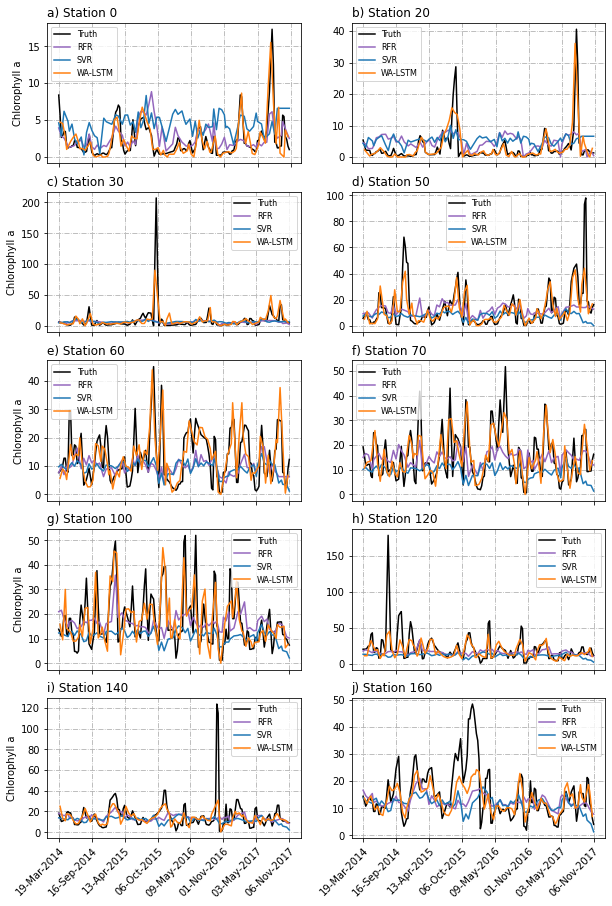

In [5]:

fig = plt.figure(figsize=(10, 15))

for i, station in enumerate(station_list):
  rfr_result_path = rfr_path + station + depth 
  svr_result_path = svr_path + station + depth 
  lstm_result_path = lstm_path + station + depth 

  # 读
  rfr_df = pd.read_csv(rfr_result_path)
  rfr_df['Date'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in rfr_df['Date'].astype(str).values.tolist()]

  svr_df = pd.read_csv(svr_result_path)
  svr_df['Date'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in svr_df['Date'].astype(str).values.tolist()]

  lstm_df = pd.read_csv(lstm_result_path)
  lstm_df['Date'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in lstm_df['Date'].astype(str).values.tolist()]

  # 增加一列
  rfr_df['tag'] = '0'
  lstm_df['tag'] = '1'

  # 合并
  all_df = pd.concat([rfr_df, lstm_df])  ## 合并df 是因为yixue和jiting的truth日期不同，但是svr和rfr的日期一样，所以只要合并一个来做x轴就可
  all_df = all_df.sort_values(by=['Date'], ignore_index=True)
  all_df['X'] = all_df.index

  # set subplot
  ax = fig.add_subplot(5, 2, i+1)
  alpha = chr(ord('a') + i)
  ax.set_title(alpha + ") Station " + station, loc='left')

  # plot groud truth
  ax.plot(all_df['X'], all_df['Groud_Truth'], label='Truth', color='black')  # Observation

  # plot rfr
  rfr_df = all_df[all_df['tag'] == '0']
  ax.plot(rfr_df['X'], rfr_df['Prediction'], label='RFR', color=purple)

  # plot svr
  ax.plot(rfr_df['X'], svr_df['Prediction'], label='SVR', color=blue)  ## svr和rfr的日期一样 按照svr来就行

  # plot lstm
  lstm_df = all_df[all_df['tag'] == '1']
  ax.plot(lstm_df['X'], lstm_df['Prediction'], label='WA-LSTM', color=orange)
  
  # 画坐标
  xtick_list = [0, 25, 50, 75, 100, 125, 150, 175]
  ax.set_xticks(xtick_list)
  ax.tick_params(axis="x", direction="in", which="minor", length=4)
  ax.tick_params(axis="y", direction="in", which="minor", length=4)
  ax.grid(ls='dashdot')  ## '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
  
  if i % 2 == 0:
    ax.set_ylabel('Chlorophyll a')

  if i == 8 or i == 9:
    xtick_label = all_df['Date'][xtick_list].to_list()
    xtick_label = [date.strftime("%d-%b-%Y") for date in xtick_label]
    ax.set_xticklabels(xtick_label)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
  else:
    ax.axes.xaxis.set_ticklabels([])

  ax.legend(prop={'family' : 'Times New Roman', 'size': 8})

plt.savefig("./figure/rfr_svr_lstm.png", dpi=300)
plt.show()

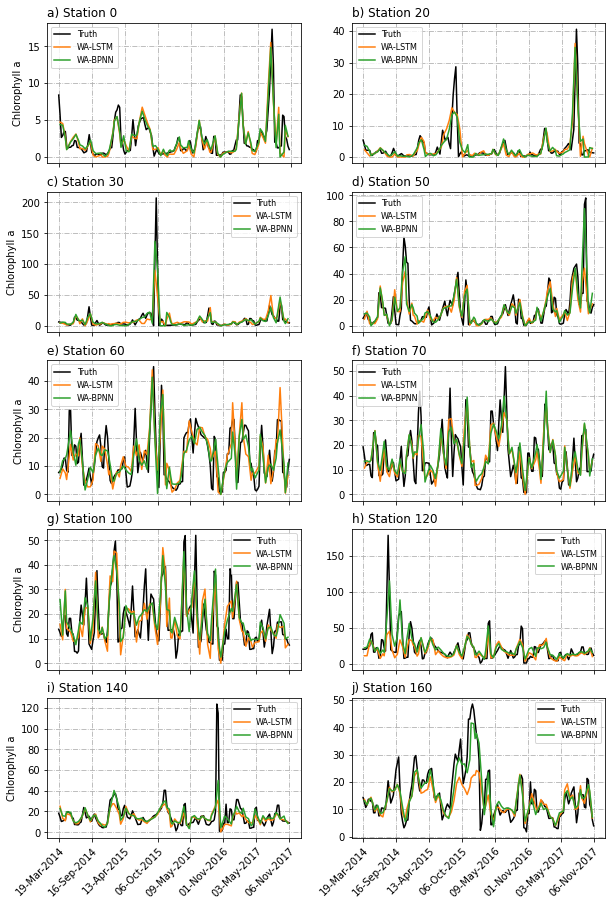

In [ ]:

fig = plt.figure(figsize=(10, 15))

for i, station in enumerate(station_list):
  rfr_result_path = rfr_path + station + depth 
  ann_result_path = ann_path + station + depth
  lstm_result_path = lstm_path + station + depth 

  # 读
  rfr_df = pd.read_csv(rfr_result_path)
  rfr_df['Date'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in rfr_df['Date'].astype(str).values.tolist()]

  ann_df = pd.read_csv(ann_result_path)
  ann_df['Date'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in ann_df['Date'].astype(str).values.tolist()]

  lstm_df = pd.read_csv(lstm_result_path)
  lstm_df['Date'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in lstm_df['Date'].astype(str).values.tolist()]

  # 增加一列
  rfr_df['tag'] = '0'
  lstm_df['tag'] = '1'

  # 合并
  all_df = pd.concat([rfr_df, lstm_df])  ## 合并df 是因为yixue和jiting的truth日期不同，但是svr和rfr的日期一样，所以只要合并一个来做x轴就可
  all_df = all_df.sort_values(by=['Date'], ignore_index=True)
  all_df['X'] = all_df.index

  # set subplot
  ax = fig.add_subplot(5, 2, i+1)
  alpha = chr(ord('a') + i)
  ax.set_title(alpha + ") Station " + station, loc='left')

  # plot groud truth
  ax.plot(all_df['X'], all_df['Groud_Truth'], label='Truth', color='black')

  # plot lstm
  lstm_df = all_df[all_df['tag'] == '1']
  ax.plot(lstm_df['X'], lstm_df['Prediction'], label='WA-LSTM', color=orange)

  # plot ann
  ax.plot(lstm_df['X'], ann_df['Prediction'], label='WA-BPNN', color=green)

  ax.grid()

  # 画坐标
  xtick_list = [0, 25, 50, 75, 100, 125, 150, 175]
  ax.set_xticks(xtick_list)
  ax.tick_params(axis="x", direction="in", which="minor", length=4)
  ax.tick_params(axis="y", direction="in", which="minor", length=4)
  ax.grid(ls='dashdot')  ## '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
  
  if i % 2 == 0:
    ax.set_ylabel('Chlorophyll a')

  if i == 8 or i == 9:
    xtick_label = all_df['Date'][xtick_list].to_list()
    xtick_label = [date.strftime("%d-%b-%Y") for date in xtick_label]
    ax.set_xticklabels(xtick_label)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
  else:
    ax.axes.xaxis.set_ticklabels([])

  ax.legend(prop={'family' : 'Times New Roman', 'size': 8})

plt.savefig("./figure/bpnn_lstm.png", dpi=300)
plt.show()

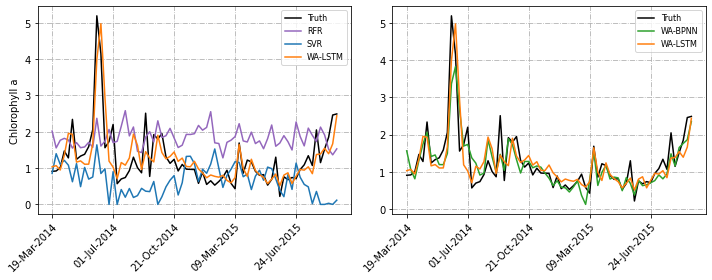

In [16]:
# 路径
rfr_result_path = "./data/Result/RFR/Scripps.csv"
svr_result_path = "./data/Result/SVR/Scripps.csv"
ann_result_path = "./data/Result/Wavelet_ANN/Scripps.csv"
lstm_result_path = "./data/Result/LSTM/Scripps.csv"

# 读
rfr_df = pd.read_csv(rfr_result_path)
rfr_df = rfr_df[1:]

svr_df = pd.read_csv(svr_result_path)
svr_df = svr_df[1:]

lstm_df = pd.read_csv(lstm_result_path)
lstm_df['Date'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in lstm_df['Date'].astype(str).values.tolist()]

ann_df = pd.read_csv(ann_result_path)
ann_df['Date'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in ann_df['Date'].astype(str).values.tolist()]

X = ann_df.index

## 画图
fig = plt.figure(figsize=(10, 4), tight_layout=True)

# set subplot left 
ax = fig.add_subplot(1, 2, 1)

# plot groud truth
ax.plot(X, ann_df['Groud_Truth'], label='Truth', color='black')  # Observation

# plot rfr
ax.plot(X, rfr_df['Prediction'], label='RFR', color=purple)

# plot svr
ax.plot(X, svr_df['Prediction'], label='SVR', color=blue)  ## svr和rfr的日期一样 按照svr来就行

# plot lstm
ax.plot(X, lstm_df['Prediction'], label='WA-LSTM', color=orange)

# 画坐标
xtick_list = [0, 15, 30, 45, 60]
ax.set_xticks(xtick_list)
ax.tick_params(axis="x", direction="in", which="minor", length=4)
ax.tick_params(axis="y", direction="in", which="minor", length=4)
ax.grid(ls='dashdot')  ## '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

ax.set_ylabel('Chlorophyll a')

xtick_label = all_df['Date'][xtick_list].to_list()
xtick_label = [date.strftime("%d-%b-%Y") for date in xtick_label]
ax.set_xticklabels(xtick_label)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.legend(prop={'family' : 'Times New Roman', 'size': 8})

## 右边
# set subplot left 
ax = fig.add_subplot(1, 2, 2)

ax.plot(X, ann_df['Groud_Truth'], label='Truth', color='black')  # Observation

# plot ann
ax.plot(X, ann_df['Prediction'], label='WA-BPNN', color=green)

# plot lstm
ax.plot(X, lstm_df['Prediction'], label='WA-LSTM', color=orange)
ax.grid()

# 画坐标
xtick_list = [0, 15, 30, 45, 60]
ax.set_xticks(xtick_list)
ax.tick_params(axis="x", direction="in", which="minor", length=4)
ax.tick_params(axis="y", direction="in", which="minor", length=4)
ax.grid(ls='dashdot')  ## '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

xtick_label = all_df['Date'][xtick_list].to_list()
xtick_label = [date.strftime("%d-%b-%Y") for date in xtick_label]
ax.set_xticklabels(xtick_label)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
  
ax.legend(prop={'family' : 'Times New Roman', 'size': 8})

plt.savefig("./figure/Scripps.png", dpi=560)
plt.show()

In [ ]:
from sklearn.metrics import r2_score

ann_path = "./data/Result/Wavelet_ANN/Station_"
only_ann_path = "./data/Result/Only_Wavelet_ANN/Station_"
lstm_path = "./data/Result/LSTM/Station_"

station_list = ['0', '20', '30', '50', '60', '70', '100', '120', '140', '160']
depth = '_Depth_1_.csv'

for i, station in enumerate(station_list):
  ann_result_path = ann_path + station + depth
  only_wavelet = only_ann_path + station + depth
  lstm_result_path = lstm_path + station + depth 
  
  ann_df = pd.read_csv(ann_result_path)
  only_wavelet_df = pd.read_csv(only_wavelet)
  lstm_df = pd.read_csv(lstm_result_path)

  print("Station %s: " % station)

  print(r2_score(ann_df['Groud_Truth'], ann_df['Prediction']))
  print(r2_score(only_wavelet_df['Groud_Truth'], only_wavelet_df['Prediction']))
  print(r2_score(lstm_df['Groud_Truth'], lstm_df['Prediction']))

Station 0: 
0.7569024221634025
0.7240892866063074
0.6975688188879816
Station 20: 
0.734433945135558
0.69700940844232
0.7040441161809725
Station 30: 
0.8926652115309708
0.8941092667839984
0.7539906267493568
Station 50: 
0.8365577938784261
0.8069957472053939
0.6993654377790817
Station 60: 
0.7519964158441343
0.6905673709781204
0.6327398035832079
Station 70: 
0.7838144846483583
0.7771726409592785
0.7902791388462551
Station 100: 
0.6976929029965544
0.6474946477335002
0.6648796524806102
Station 120: 
0.7454389865771015
0.7414536222125312
0.48241733978635337
Station 140: 
0.6308541075228224
0.5724152680620587
0.40658525494470066
Station 160: 
0.8283346188037446
0.8339516485949883
0.5274088843832823


<Figure size 720x1080 with 0 Axes>

In [ ]:
from sklearn.metrics import r2_score

ann_path = "./data/Result/Wavelet_ANN/Station_"
only_ann_path = "./data/Result/Only_Wavelet_ANN/Station_"
lstm_path = "./data/Result/LSTM/Station_"

station_list = ['0', '20', '30', '50', '60', '70', '100', '120', '140', '160']
depth = '_Depth_1_.csv'


for i, station in enumerate(station_list):
  ann_result_path = ann_path + station + depth
  only_wavelet = only_ann_path + station + depth
  lstm_result_path = lstm_path + station + depth 
  
  ann_df = pd.read_csv(ann_result_path)
  only_wavelet_df = pd.read_csv(only_wavelet)
  lstm_df = pd.read_csv(lstm_result_path)

  print("Station %s: " % station)

  print(np.std(ann_df['Groud_Truth']))

Station 0: 
2.3015987858031015
Station 20: 
4.829694304599236
Station 30: 
15.263316894015931
Station 50: 
14.514521310903723
Station 60: 
8.045225524061276
Station 70: 
8.702099252758472
Station 100: 
9.582275350062357
Station 120: 
16.74415657669548
Station 140: 
12.872440126955746
Station 160: 
9.42938762354641


In [ ]:
ann_path = "./data/Result/Wavelet_ANN/Scripps.csv"
only_ann_path = "./data/Result/Only_Wavelet_ANN/Scripps.csv"
lstm_path = "./data/Result/LSTM/Scripps.csv"

ann_df = pd.read_csv(ann_path)
only_wavelet_df = pd.read_csv(only_ann_path)
lstm_df = pd.read_csv(lstm_path)

print(r2_score(ann_df['Groud_Truth'], ann_df['Prediction']))
print(r2_score(only_wavelet_df['Groud_Truth'], only_wavelet_df['Prediction']))
print(r2_score(lstm_df['Groud_Truth'], lstm_df['Prediction']))

0.7328311892511641
0.6487257169908731
0.7024226425639073


In [ ]:
print(np.std(lstm_df['Groud_Truth']))

0.7885830907480122


In [ ]:
# 小波分解
# https://www.jianshu.com/p/56733f6c0a10
# https://stackoverflow.com/questions/45051106/multilevel-partial-wavelet-reconstruction-with-pywavelets
import pywt
def wavlet_transform(df_chla, feature_name, wavelet_type, level_num):
  # wrcoef在pywt中没有实现
  # 分解得到小波树，多层分解要用wavedec
  wave = pywt.wavedec(df_chla[feature_name], wavelet_type, level=level_num)
  wave_length = len(df_chla[feature_name])

  #小波重构
  for i in range(1, level_num+1+1):
    # 循环得到不同频率的重构小波
    col_name = feature_name + '_d' + str(i)
    if i == level_num+1:
      col_name = feature_name +  '_a' + str(i-1) # 'a4'

    select_column = [0] * (level_num+1) # [0, 0, 0, 0, 0]
    select_column[level_num+1-i] = 1 # [0, 0, 0, 0, 1]

    # 加入到df中
    df_chla[col_name] = pywt.waverec(np.multiply(wave, select_column).tolist(), wavelet_type)[:wave_length]

  return df_chla

# 绘制分解后的叶绿素小波变量
def plot_signal_decomp(df_chla, feature_name, level_num):
  def add_subplot(X, y, name):
    plt.figure(figsize=(6.4, 2.4))
    plt.axis('off')
    plt.plot(X, y, color='steelblue')
    plt.savefig('./figure/' + name, transparent=True)
    
  
  data = df_chla[feature_name]
  X = range(len(data))
  
  add_subplot(X, data, 'signal.png')

  add_subplot(X, df_chla[feature_name + '_a' + str(level_num)], 'a' + str(level_num) + '.png')

  for i in range(1, level_num+1):
    # 循环得到不同频率的重构小波
    cur_level = level_num+1-i # 先找d4，再d3...
    col_name = feature_name + '_d' + str(cur_level)

    add_subplot(X, df_chla[col_name], 'd' + str(cur_level) + '.png')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



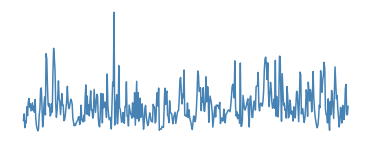

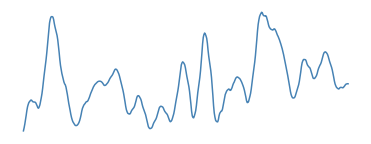

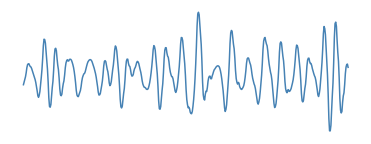

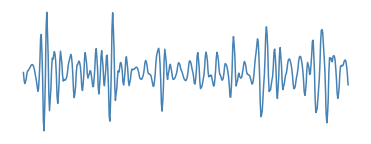

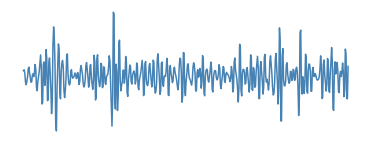

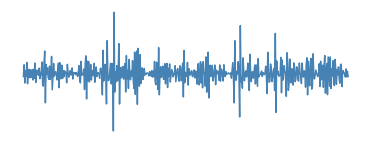

In [ ]:
station_num = '70'
df = pd.read_csv('./data/Junan Modmon Data/new_interpolated_Station_' + station_num + '_Depth_1_.csv')
df = df[['TotalChla']]

wav_dict = {'wav_col': 'TotalChla', 'wavelet_type': 'db4', 'level_num': 4}
df_chla = wavlet_transform(df, wav_dict['wav_col'], wav_dict['wavelet_type'], wav_dict['level_num'])
plot_signal_decomp(df_chla, wav_dict['wav_col'], wav_dict['level_num'])
